<a href="https://colab.research.google.com/github/kpabian/ML/blob/main/projekt_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
import warnings
warnings.filterwarnings('ignore')

Dodawanie plików

In [252]:
df=pd.read_csv('loan_data.csv')

In [253]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


Sprawdzanie informacji o danych ( np. typu danych)

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Zmiana wieku z float na int

In [255]:
df.person_age = df.person_age.astype(dtype='int64')

Sprawdzenie brakujących danych

In [256]:
df.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


Sprawdzenie duplikatów

In [257]:
df.duplicated().sum()

np.int64(0)

Sprawdzenie miar statystycznych dla zbioru danych

In [258]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


Usuwanie wierszy, gdzie wiek > 100

In [259]:
df = df[df['person_age'] <= 100]
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


Podział na dane numeryczne i jakościowe


In [260]:
numerical = df.select_dtypes(include=np.number)
numerical

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,22,71948.0,0,35000.0,16.02,0.49,3.0,561,1
1,21,12282.0,0,1000.0,11.14,0.08,2.0,504,0
2,25,12438.0,3,5500.0,12.87,0.44,3.0,635,1
3,23,79753.0,0,35000.0,15.23,0.44,2.0,675,1
4,24,66135.0,1,35000.0,14.27,0.53,4.0,586,1
...,...,...,...,...,...,...,...,...,...
44995,27,47971.0,6,15000.0,15.66,0.31,3.0,645,1
44996,37,65800.0,17,9000.0,14.07,0.14,11.0,621,1
44997,33,56942.0,7,2771.0,10.02,0.05,10.0,668,1
44998,29,33164.0,4,12000.0,13.23,0.36,6.0,604,1


In [261]:
categorical = df.select_dtypes(exclude=np.number)
categorical

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,female,Master,RENT,PERSONAL,No
1,female,High School,OWN,EDUCATION,Yes
2,female,High School,MORTGAGE,MEDICAL,No
3,female,Bachelor,RENT,MEDICAL,No
4,male,Master,RENT,MEDICAL,No
...,...,...,...,...,...
44995,male,Associate,RENT,MEDICAL,No
44996,female,Associate,RENT,HOMEIMPROVEMENT,No
44997,male,Associate,RENT,DEBTCONSOLIDATION,No
44998,male,Bachelor,RENT,EDUCATION,No


Wizualizacja danych numerycznych

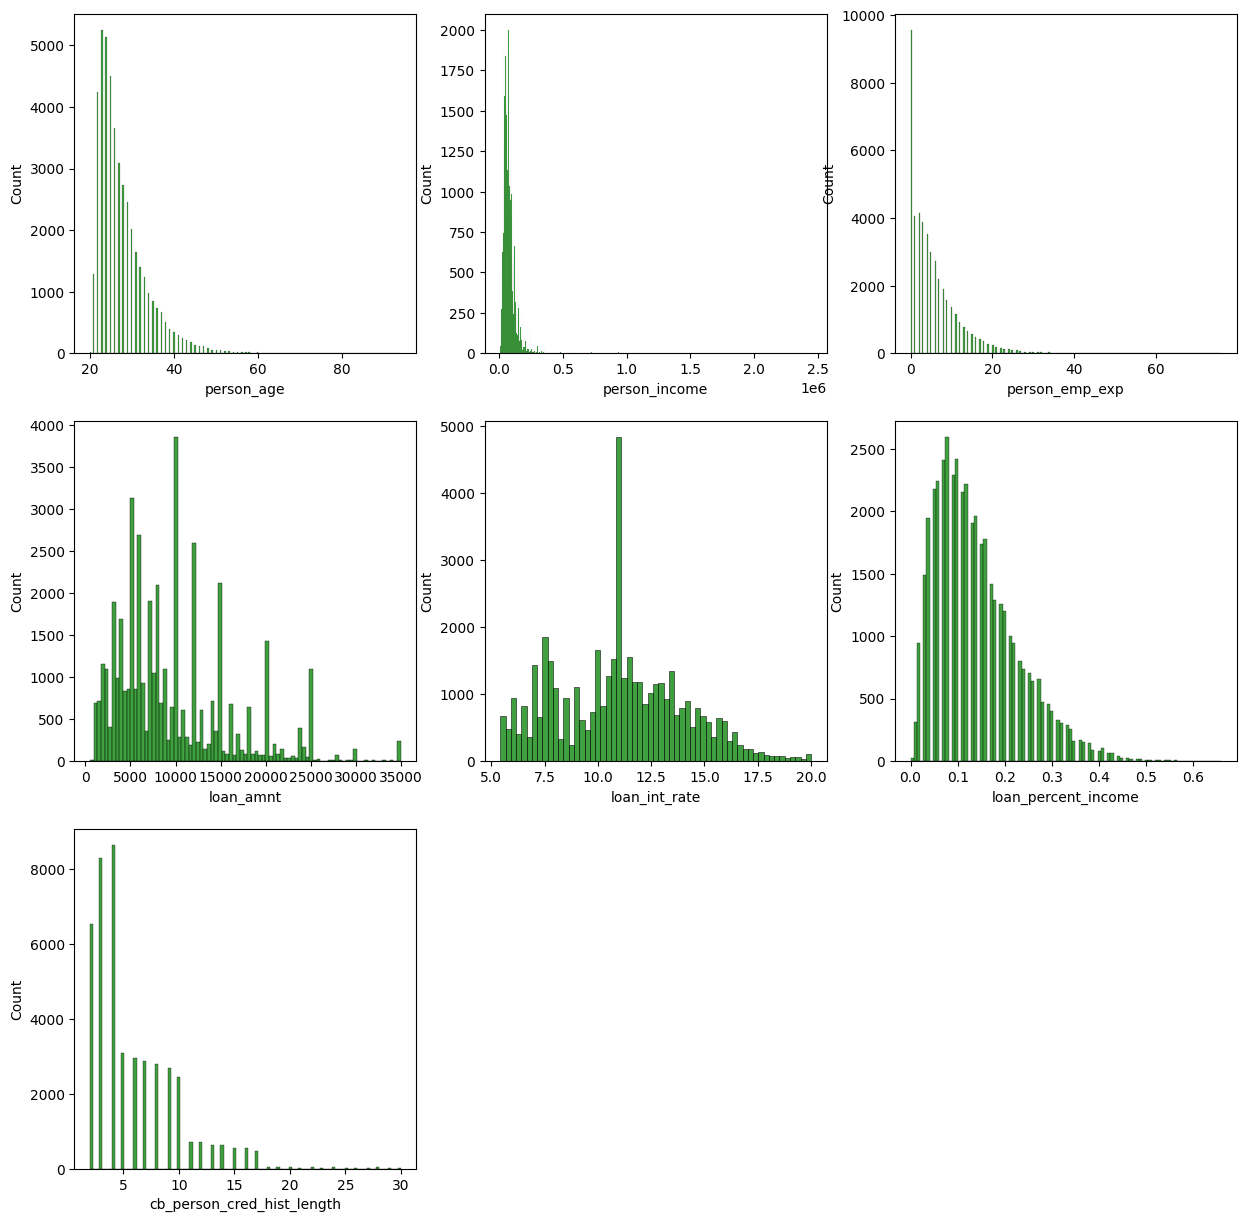

In [262]:
plt.figure(figsize=(15,15))
for i,col in zip(range(1,8),df[['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']]) :
    plt.subplot(3,3,i)
    sns.histplot(data = df , x=df[col], color='green')
plt.show()

Sprawdzenie korelecji kolummny loan_status

In [263]:
df.corr(numeric_only=True)['loan_status']

,loan_status
person_age,-0.020545
person_income,-0.169034
person_emp_exp,-0.019529
loan_amnt,0.107725
loan_int_rate,0.332046
loan_percent_income,0.384873
cb_person_cred_hist_length,-0.014733
credit_score,-0.007409
loan_status,1.000000


Sprawdzenie korelecji całej tabeli

In [264]:
correlation = numerical.corr()
correlation

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
person_age,1.000000,0.144634,0.952294,0.052080,0.012757,-0.041955,0.878659,0.174648,-0.020545
person_income,0.144634,1.000000,0.134666,0.312441,-0.001361,-0.287149,0.128832,0.025462,-0.169034
person_emp_exp,0.952294,0.134666,1.000000,0.045792,0.016055,-0.038434,0.840146,0.182592,-0.019529
loan_amnt,0.052080,0.312441,0.045792,1.000000,0.146160,0.592972,0.043250,0.009126,0.107725
loan_int_rate,0.012757,-0.001361,0.016055,0.146160,1.000000,0.125322,0.017886,0.011339,0.332046
loan_percent_income,-0.041955,-0.287149,-0.038434,0.592972,0.125322,1.000000,-0.031436,-0.011064,0.384873
cb_person_cred_hist_length,0.878659,0.128832,0.840146,0.043250,0.017886,-0.031436,1.000000,0.154713,-0.014733
credit_score,0.174648,0.025462,0.182592,0.009126,0.011339,-0.011064,0.154713,1.000000,-0.007409
loan_status,-0.020545,-0.169034,-0.019529,0.107725,0.332046,0.384873,-0.014733,-0.007409,1.000000


Podział danych na target i data

In [265]:
target = df.loan_status
data = df.drop('loan_status', axis=1)

Sprawdzenie kształtu

In [266]:
data.shape

(44993, 13)

In [267]:
target.shape

(44993,)

Heatmap korelacji

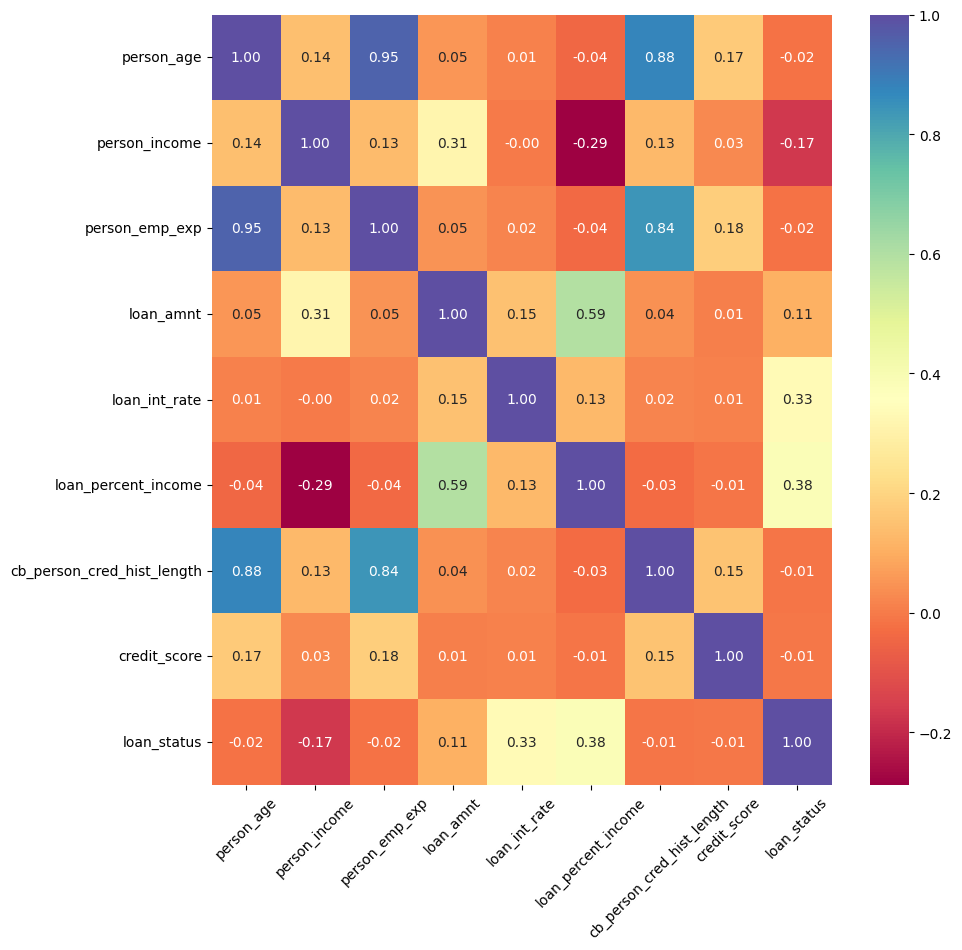

In [268]:
plt.figure(figsize=(10, 10))
cus_cmap = sns.color_palette("Spectral", as_cmap=True)

ax = sns.heatmap(
    correlation,
    cmap=cus_cmap,
    annot=True,
    fmt=".2f"
)

plt.xticks(rotation=45)
plt.show()

Wizualizacja danych jakościowych

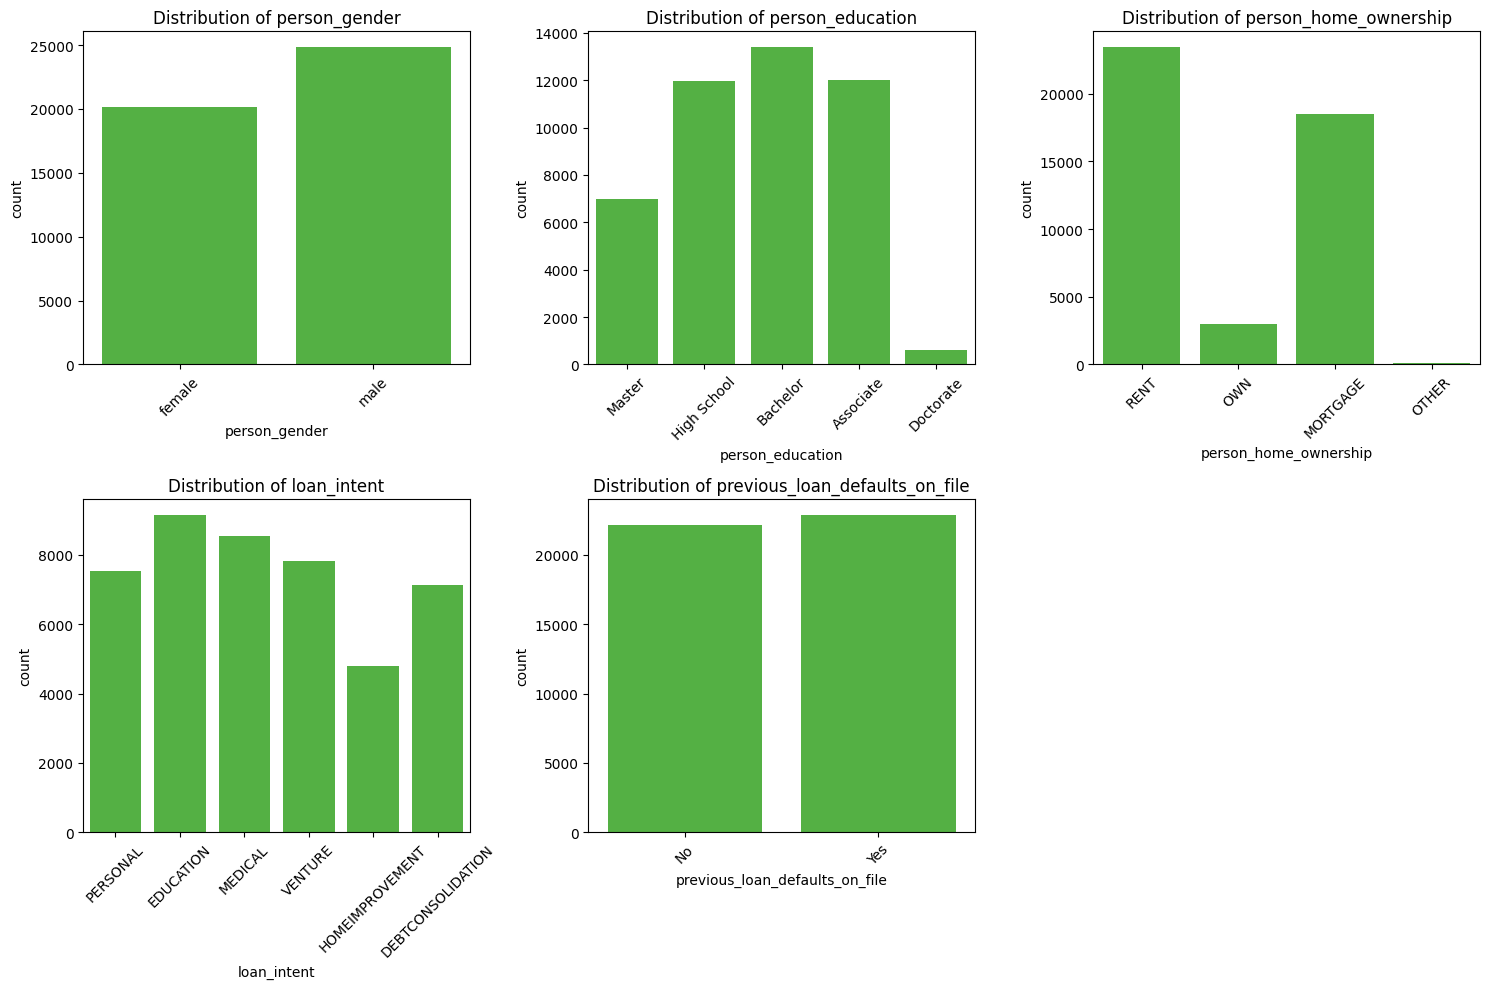

In [269]:
n_cols = 3
n_rows = 2

plt.figure(figsize=(15, n_rows * 5))

for i, col_name in enumerate(categorical.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=col_name, color="#48c232")
    plt.title(f'Distribution of {col_name}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Enkodowanie danych jakościowych

In [275]:
encode = LabelEncoder()

In [276]:
for col in categorical :
  data[col] = encode.fit_transform(data[col])

Skalowanie danych

In [278]:
scaler = StandardScaler()

In [279]:
xtrain , xtest , ytrain , ytest = train_test_split(data,target , test_size=0.2)

In [280]:
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

Przekształcenie na DataFrame z Pandas

In [281]:
xtrain = pd.DataFrame(xtrain , columns=data.columns[:13])
xtest = pd.DataFrame(xtest , columns=data.columns[:13])

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(data)

In [ ]:
trainX_std = scaler.transform(xtrain)
testX_std = scaler.transform(xtest)

In [ ]:
mlp.fit(xtrain, ytrain)

In [ ]:
pred=mlp.predict(xtest)
print(pred)
print(ytest)

In [ ]:
(ytest!=pred).sum()

In [ ]:
accuracy_score(ytest, pred)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
sns.heatmap(confusion_matrix(ytest, pred), annot=True, cmap='jet', fmt='d')